In [1]:
import scipy.io # To use the '.mat' files
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
for root, dirs, files in os.walk("0hp_load_48_kHz", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

0hp_load_48_kHz\007_B.mat
0hp_load_48_kHz\007_IR.mat
0hp_load_48_kHz\007_OR_12.mat
0hp_load_48_kHz\007_OR_3.mat
0hp_load_48_kHz\007_OR_6.mat
0hp_load_48_kHz\014_B.mat
0hp_load_48_kHz\014_IR.mat
0hp_load_48_kHz\014_OR_6.mat
0hp_load_48_kHz\021_B.mat
0hp_load_48_kHz\021_IR.mat
0hp_load_48_kHz\021_OR_12.mat
0hp_load_48_kHz\021_OR_3.mat
0hp_load_48_kHz\021_OR_6.mat
0hp_load_48_kHz\N.mat


In [3]:
path = r'0hp_load_48_kHz\007_OR_3.mat'
mat = scipy.io.loadmat(path)

In [4]:
mat.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 12:03:42 2000'), ('__version__', '1.0'), ('__globals__', []), ('X148_DE_time', array([[ 0.471888  ],
       [ 0.44184738],
       [ 0.35151692],
       ...,
       [-0.34108615],
       [-0.328152  ],
       [-0.29060123]])), ('X148_FE_time', array([[-0.15059818],
       [-0.16641818],
       [-0.12142364],
       ...,
       [ 0.10848   ],
       [ 0.01664182],
       [-0.07478545]])), ('X148RPM', array([[1797]], dtype=uint16))])

In [5]:
list(mat.keys())

['__header__',
 '__version__',
 '__globals__',
 'X148_DE_time',
 'X148_FE_time',
 'X148RPM']

In [6]:
key_name = list(mat.keys())[3]

In [7]:
DE_data = mat.get(key_name)

In [8]:
file_name

'N.mat'

In [9]:
fault = np.full((len(DE_data), 1), file_name[:-4])

In [10]:
df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})

In [11]:
df_temp

,DE_data,fault
0,0.471888,N
1,0.441847,N
2,0.351517,N
3,0.224679,N
4,0.091999,N
...,...,...
124597,-0.289975,N
124598,-0.332950,N
124599,-0.341086,N
124600,-0.328152,N


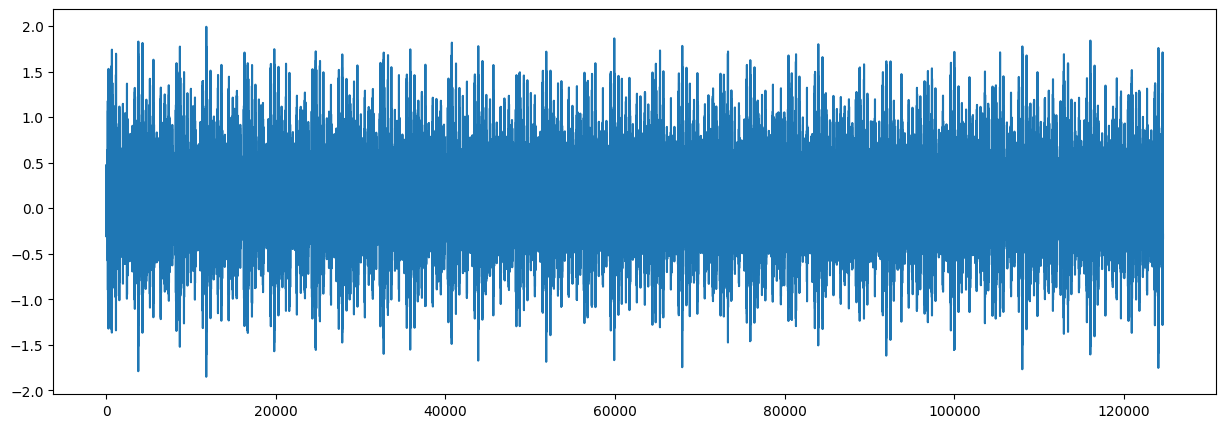

In [12]:
plt.figure(figsize=(15,5))
plt.plot(df_temp.iloc[:,0])
plt.show()

In [13]:
df=pd.DataFrame(columns=['DE_data','fault'])

for root, dirs, files in os.walk("0hp_load_48_kHz", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

        mat = scipy.io.loadmat(path)

        key_name = list(mat.keys())[3]
        DE_data = mat.get(key_name)
        fault = np.full((len(DE_data), 1), file_name[:-4])

        df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})
        
        df = pd.concat([df,df_temp],axis=0)
        print(df['fault'].unique())
        
df.to_csv('0hp_all_faults.csv',index=False)

0hp_load_48_kHz\007_B.mat
['007_B']
0hp_load_48_kHz\007_IR.mat


C:\Users\justy\AppData\Local\Temp\ipykernel_9532\933462964.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,df_temp],axis=0)


['007_B' '007_IR']
0hp_load_48_kHz\007_OR_12.mat
['007_B' '007_IR' '007_OR_12']
0hp_load_48_kHz\007_OR_3.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3']
0hp_load_48_kHz\007_OR_6.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6']
0hp_load_48_kHz\014_B.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B']
0hp_load_48_kHz\014_IR.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' '014_IR']
0hp_load_48_kHz\014_OR_6.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' '014_IR'
 '014_OR_6']
0hp_load_48_kHz\021_B.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' '014_IR'
 '014_OR_6' '021_B']
0hp_load_48_kHz\021_IR.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' '014_IR'
 '014_OR_6' '021_B' '021_IR']
0hp_load_48_kHz\021_OR_12.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' '014_IR'
 '014_OR_6' '021_B' '021_IR' '021_OR_12']
0hp_load_48_kHz\021_OR_3.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' 

PermissionError: [Errno 13] Permission denied: '0hp_all_faults.csv'

In [14]:
df = pd.read_csv('0hp_all_faults.csv')

In [16]:
df

,DE_data,fault
0,-0.111192,007_B
1,-0.083029,007_B
2,-0.042349,007_B
3,0.008970,007_B
4,0.057578,007_B
...,...,...
2782624,-0.059664,N
2782625,-0.063836,N
2782626,-0.034630,N
2782627,0.016689,N


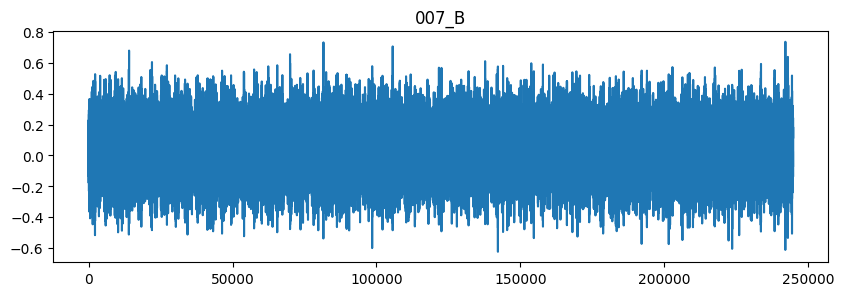

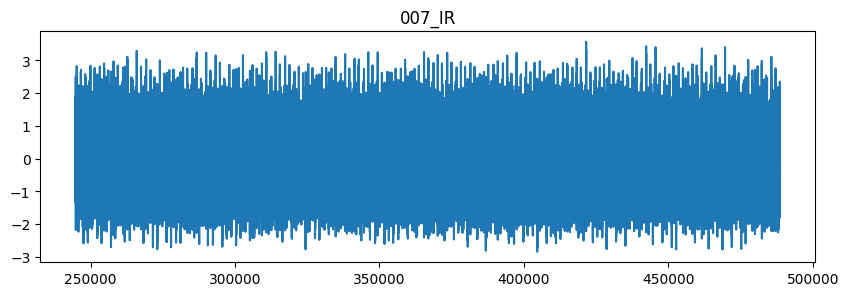

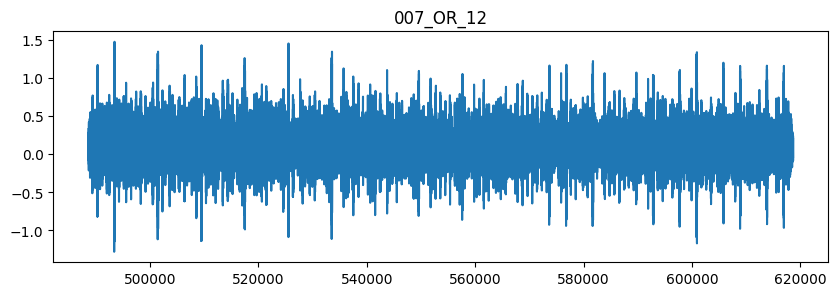

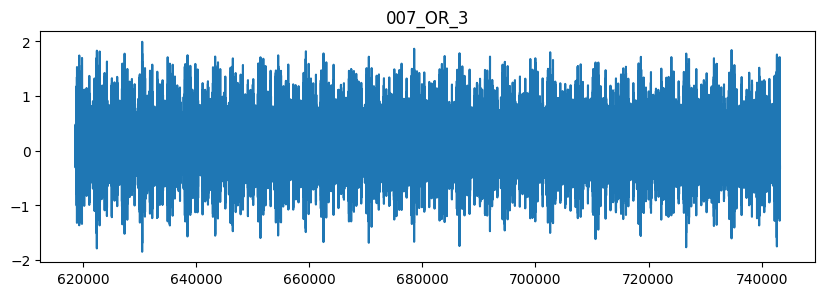

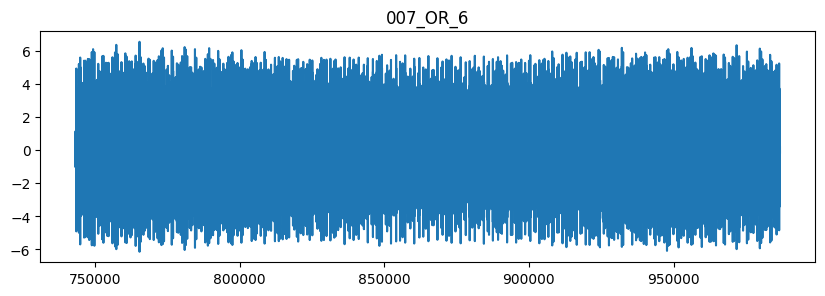

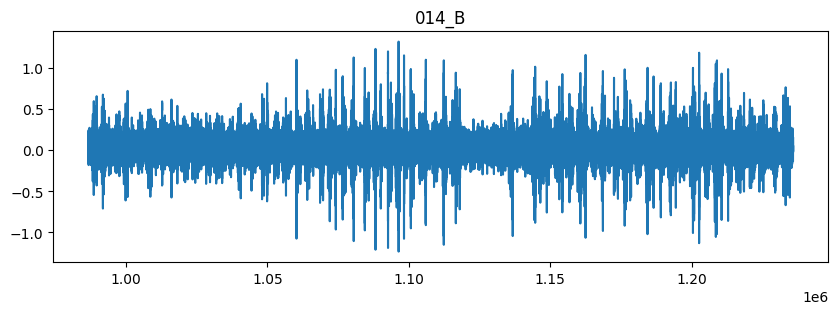

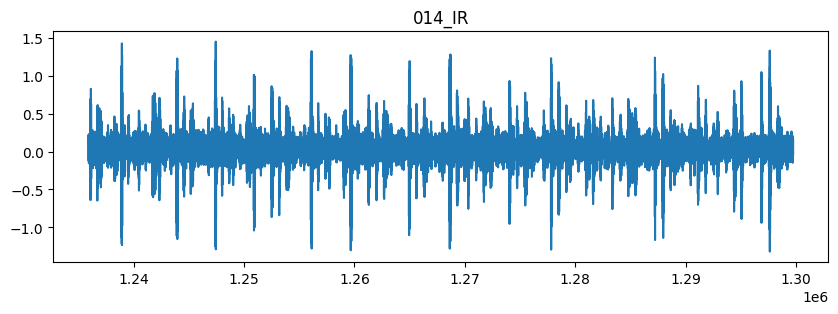

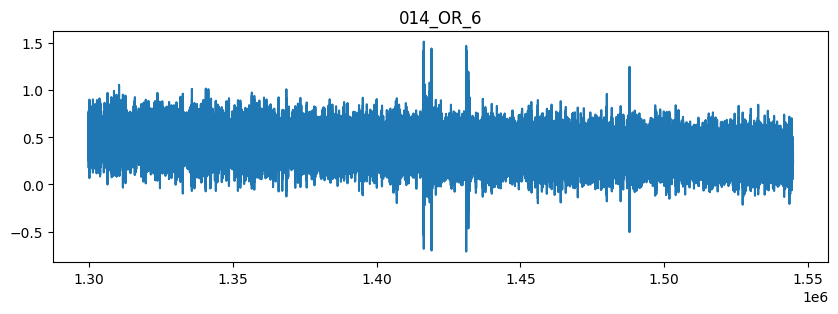

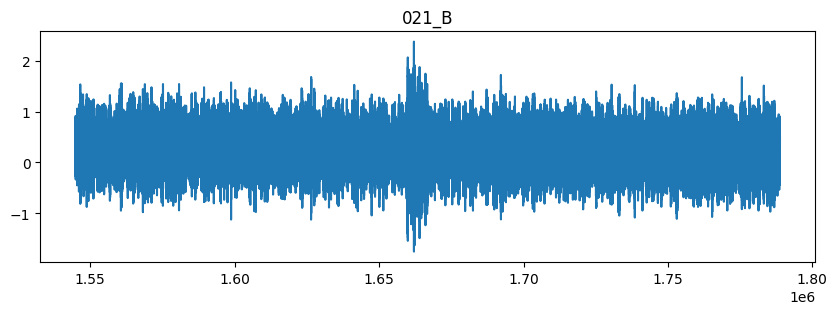

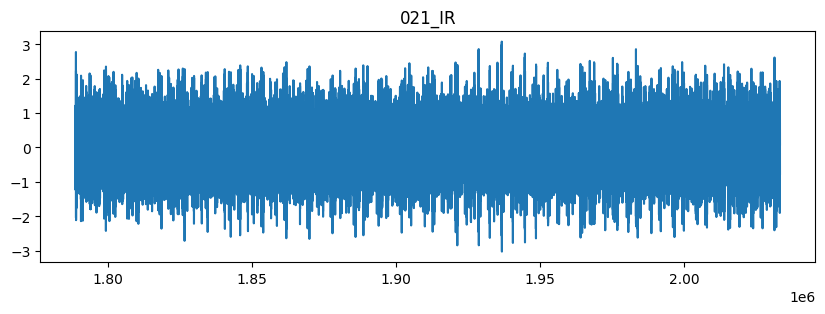

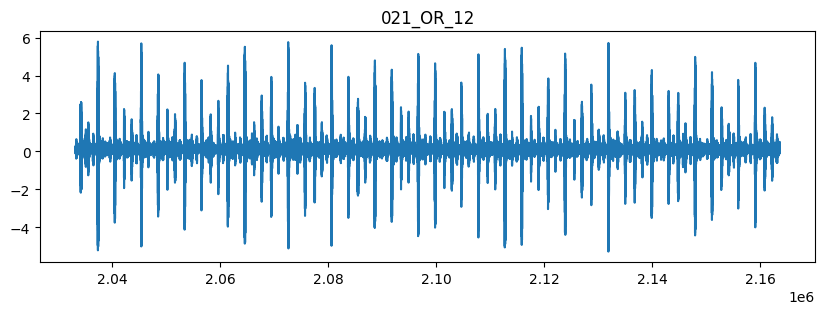

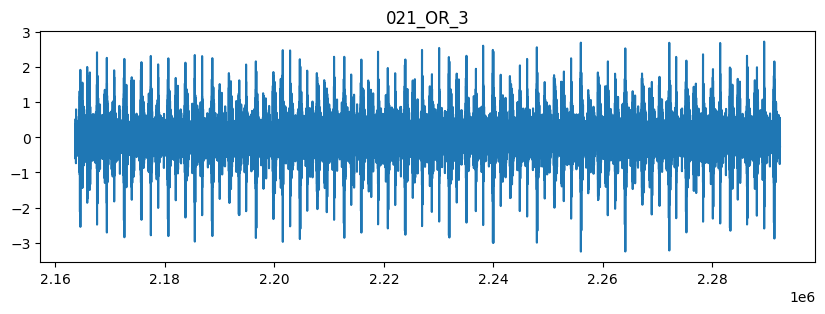

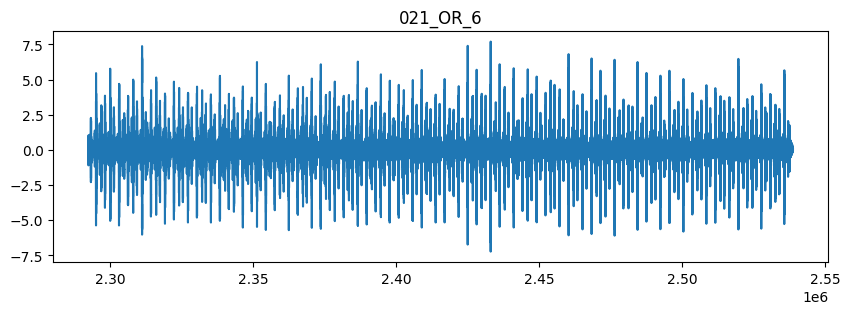

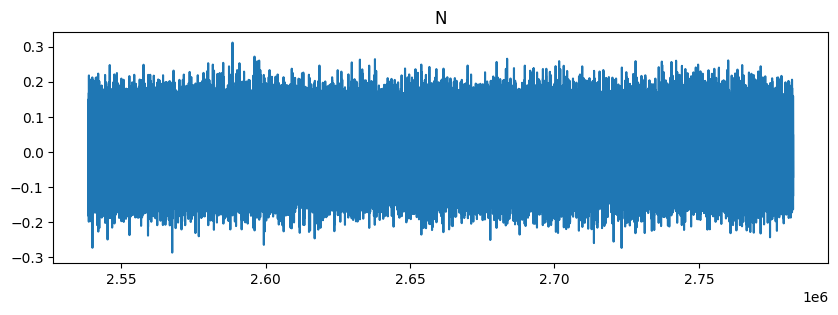

In [17]:
faults = df['fault'].unique()
for  f in faults:
    plt.figure(figsize=(10,3))
    plt.plot(df[df['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

C:\Users\justy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\justy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\justy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

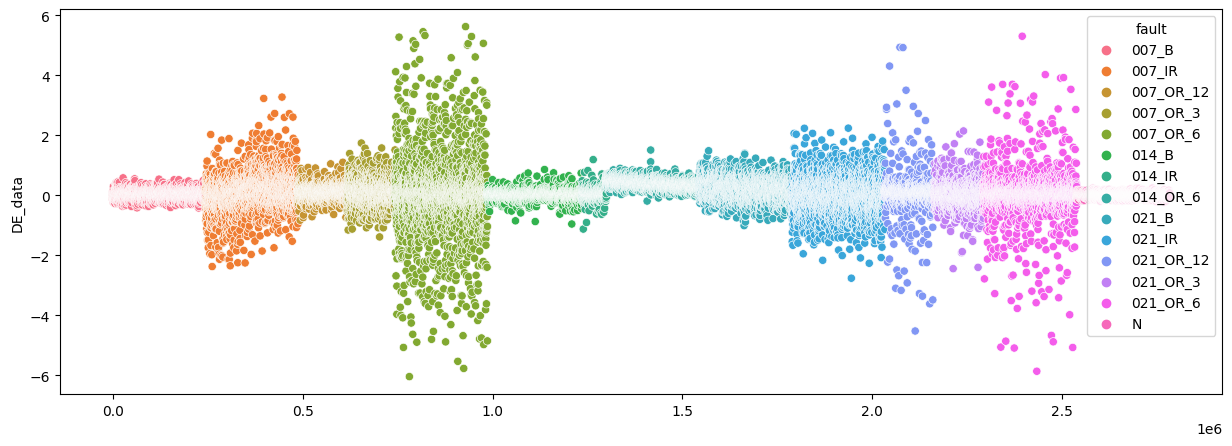

In [18]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df.iloc[::100,:],y='DE_data',x=np.arange(0,len(df),100),hue='fault')
plt.show()

In [19]:
load=1

df=pd.DataFrame(columns=['DE_data','fault'])

for root, dirs, files in os.walk("{}hp_load_48_kHz".format(load), topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

        mat = scipy.io.loadmat(path)

        for k in list(mat.keys()):
            if k[5:]== 'DE_time':
                key_name=k
        DE_data = mat.get(key_name)
        fault = np.full((len(DE_data), 1), file_name[:-4])

        df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})
        
        df = pd.concat([df,df_temp],axis=0)
        print(df['fault'].unique())
        
df.to_csv('{}hp_all_faults.csv'.format(load),index=False)

1hp_load_48_kHz\007_B.mat
['007_B']
1hp_load_48_kHz\007_IR.mat


C:\Users\justy\AppData\Local\Temp\ipykernel_9532\3875698544.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,df_temp],axis=0)


['007_B' '007_IR']
1hp_load_48_kHz\007_OR_12.mat
['007_B' '007_IR' '007_OR_12']
1hp_load_48_kHz\007_OR_3.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3']
1hp_load_48_kHz\007_OR_6.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6']
1hp_load_48_kHz\014_B.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B']
1hp_load_48_kHz\014_IR.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' '014_IR']
1hp_load_48_kHz\014_OR_6.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' '014_IR'
 '014_OR_6']
1hp_load_48_kHz\021_B.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' '014_IR'
 '014_OR_6' '021_B']
1hp_load_48_kHz\021_IR.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' '014_IR'
 '014_OR_6' '021_B' '021_IR']
1hp_load_48_kHz\021_OR_12.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' '014_IR'
 '014_OR_6' '021_B' '021_IR' '021_OR_12']
1hp_load_48_kHz\021_OR_3.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' 

In [20]:
load=2

df=pd.DataFrame(columns=['DE_data','fault'])

for root, dirs, files in os.walk("{}hp_load_48_kHz".format(load), topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

        mat = scipy.io.loadmat(path)

        for k in list(mat.keys()):
            if k[5:]== 'DE_time':
                key_name=k
        DE_data = mat.get(key_name)
        fault = np.full((len(DE_data), 1), file_name[:-4])

        df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})
        
        df = pd.concat([df,df_temp],axis=0)
        print(df['fault'].unique())
        
df.to_csv('{}hp_all_faults.csv'.format(load),index=False)

2hp_load_48_kHz\007_B.mat
['007_B']
2hp_load_48_kHz\007_IR.mat


C:\Users\justy\AppData\Local\Temp\ipykernel_9532\3188200821.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,df_temp],axis=0)


['007_B' '007_IR']
2hp_load_48_kHz\007_OR_12.mat
['007_B' '007_IR' '007_OR_12']
2hp_load_48_kHz\007_OR_3.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3']
2hp_load_48_kHz\007_OR_6.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6']
2hp_load_48_kHz\014_B.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B']
2hp_load_48_kHz\014_IR.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' '014_IR']
2hp_load_48_kHz\014_OR_6.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' '014_IR'
 '014_OR_6']
2hp_load_48_kHz\021_B.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' '014_IR'
 '014_OR_6' '021_B']
2hp_load_48_kHz\021_IR.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' '014_IR'
 '014_OR_6' '021_B' '021_IR']
2hp_load_48_kHz\021_OR_12.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' '014_IR'
 '014_OR_6' '021_B' '021_IR' '021_OR_12']
2hp_load_48_kHz\021_OR_3.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' 

In [21]:
load=3

df=pd.DataFrame(columns=['DE_data','fault'])

for root, dirs, files in os.walk("{}hp_load_48_KHz".format(load), topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

        mat = scipy.io.loadmat(path)

        for k in list(mat.keys()):
            if k[5:]== 'DE_time':
                key_name=k
        DE_data = mat.get(key_name)
        fault = np.full((len(DE_data), 1), file_name[:-4])

        df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})
        
        df = pd.concat([df,df_temp],axis=0)
        print(df['fault'].unique())
        
df.to_csv('{}hp_all_faults.csv'.format(load),index=False)

3hp_load_48_KHz\007_B.mat
['007_B']
3hp_load_48_KHz\007_IR.mat


C:\Users\justy\AppData\Local\Temp\ipykernel_17396\3620056290.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,df_temp],axis=0)


['007_B' '007_IR']
3hp_load_48_KHz\007_OR_12.mat
['007_B' '007_IR' '007_OR_12']
3hp_load_48_KHz\007_OR_3.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3']
3hp_load_48_KHz\007_OR_6.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6']
3hp_load_48_KHz\014_B.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B']
3hp_load_48_KHz\014_IR.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' '014_IR']
3hp_load_48_KHz\014_OR_6.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' '014_IR'
 '014_OR_6']
3hp_load_48_KHz\021_B.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' '014_IR'
 '014_OR_6' '021_B']
3hp_load_48_KHz\021_IR.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' '014_IR'
 '014_OR_6' '021_B' '021_IR']
3hp_load_48_KHz\021_OR_12.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' '014_IR'
 '014_OR_6' '021_B' '021_IR' '021_OR_12']
3hp_load_48_KHz\021_OR_3.mat
['007_B' '007_IR' '007_OR_12' '007_OR_3' '007_OR_6' '014_B' 

In [21]:
df1 = pd.read_csv('1hp_all_faults.csv')

In [22]:
df1

,DE_data,fault
0,-0.041097,007_B
1,-0.046104,007_B
2,-0.028372,007_B
3,0.001252,007_B
4,0.033796,007_B
...,...,...
6701633,-0.043183,N
6701634,-0.067383,N
6701635,-0.099092,N
6701636,-0.108271,N


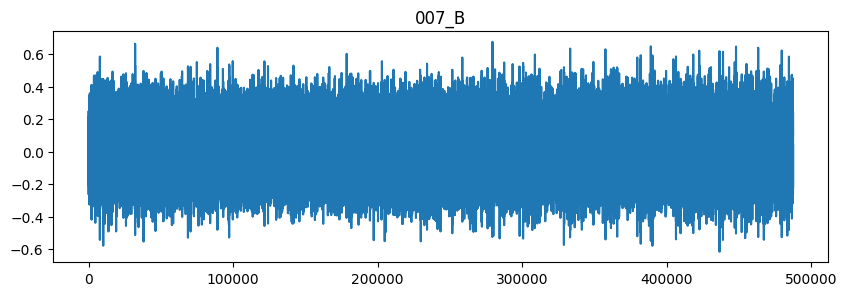

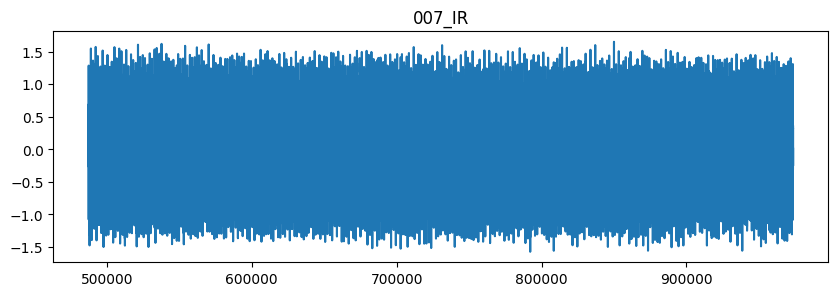

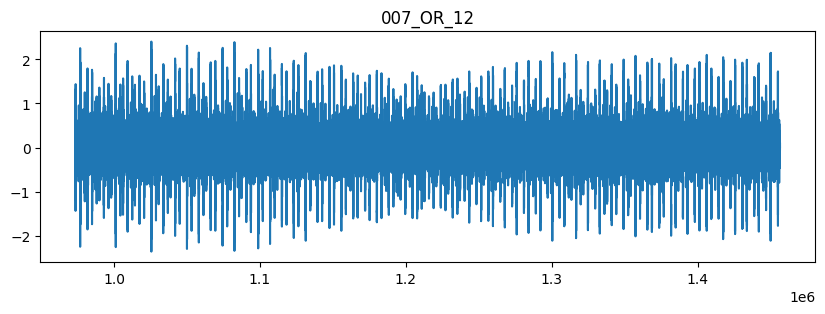

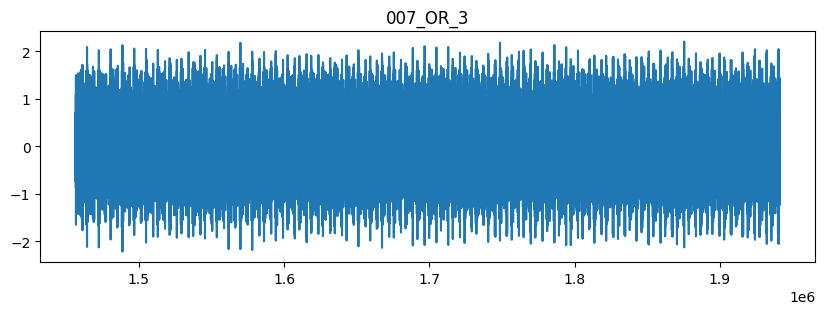

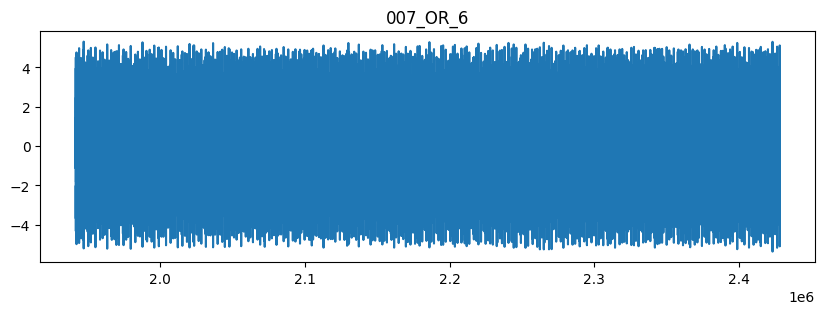

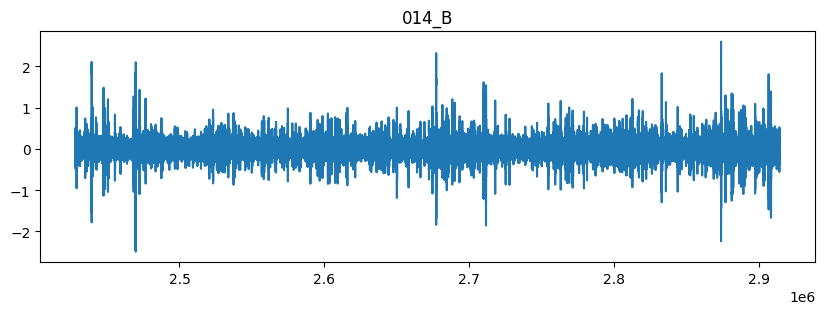

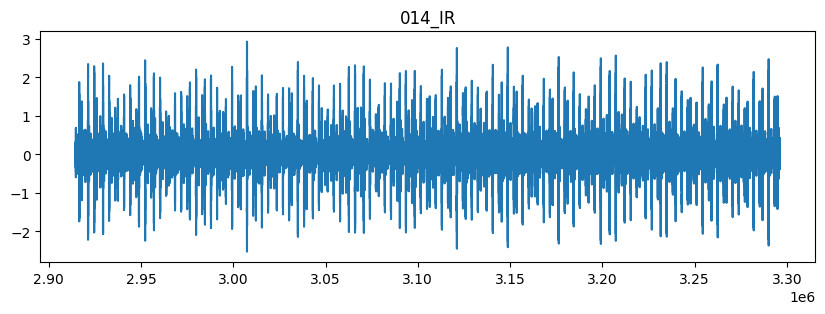

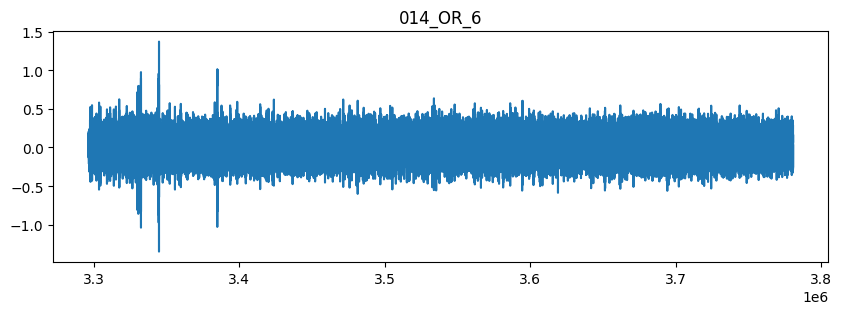

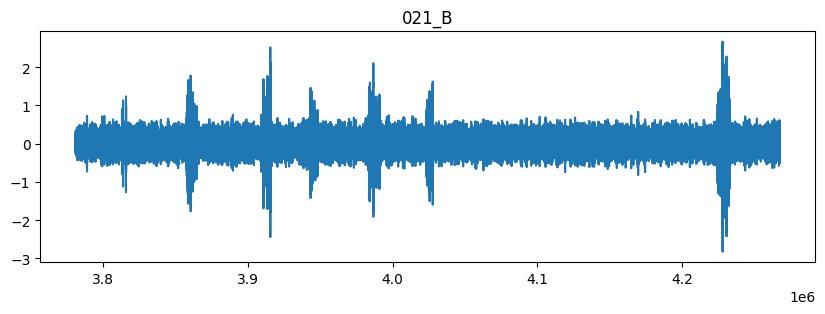

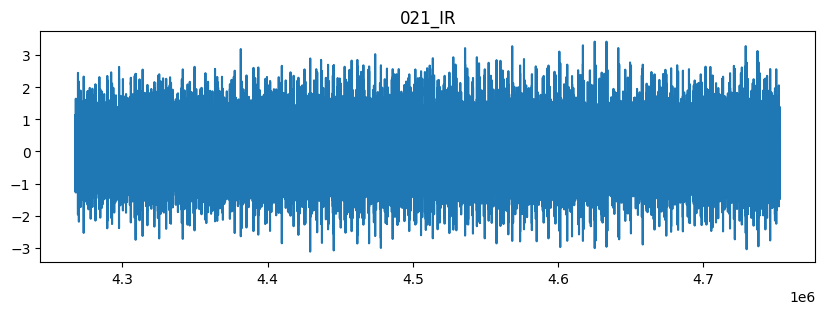

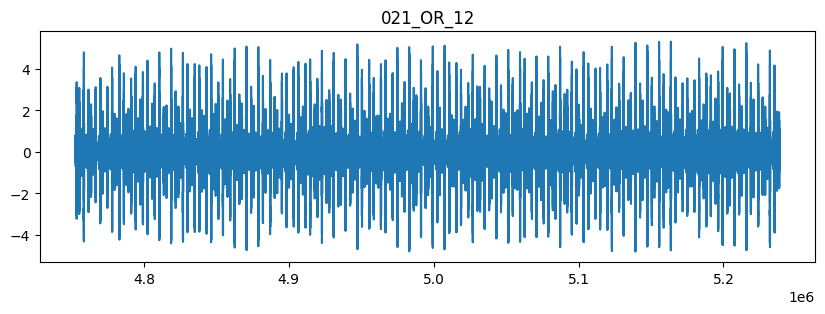

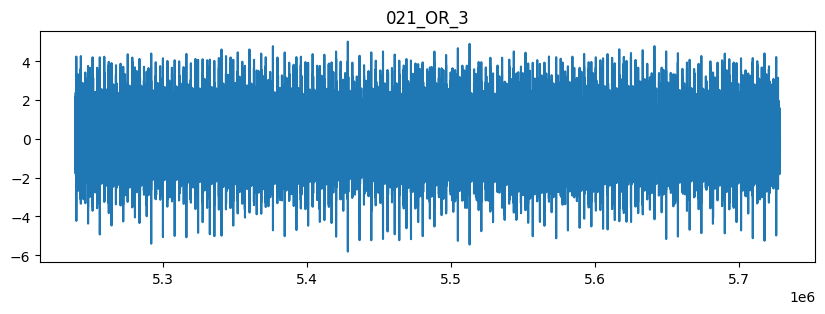

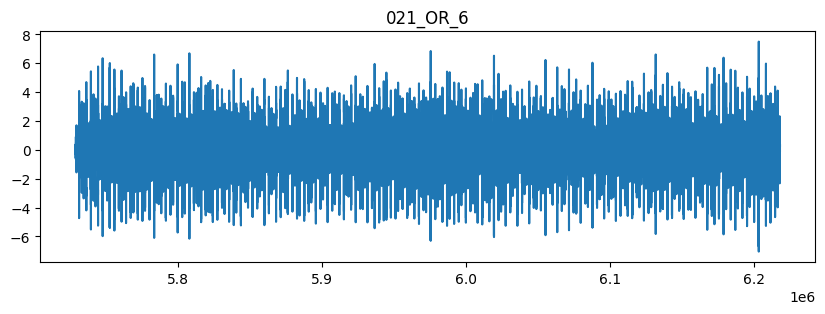

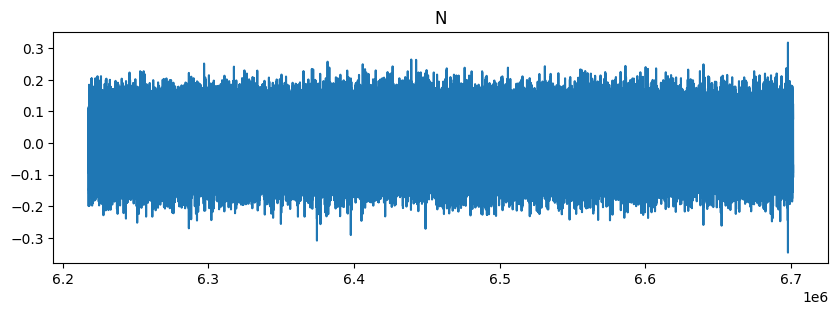

In [23]:
faults1 = df1['fault'].unique()
for  f in faults1:
    plt.figure(figsize=(10,3))
    plt.plot(df1[df1['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

In [24]:
df2 = pd.read_csv('2hp_all_faults.csv')

In [25]:
df2

,DE_data,fault
0,0.099927,007_B
1,0.141650,007_B
2,0.178366,007_B
3,0.194638,007_B
4,0.168770,007_B
...,...,...
6816409,0.023991,N
6816410,0.034004,N
6816411,0.005215,N
6816412,-0.065714,N


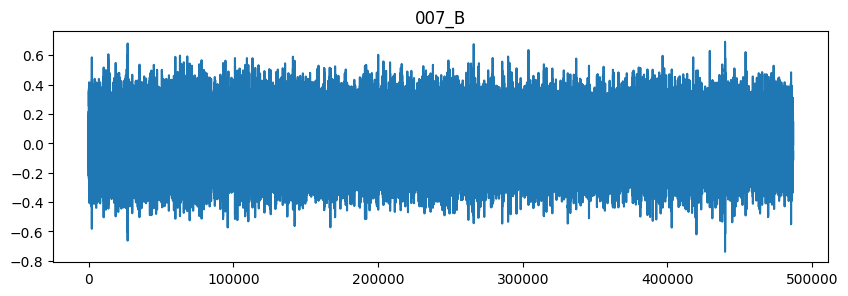

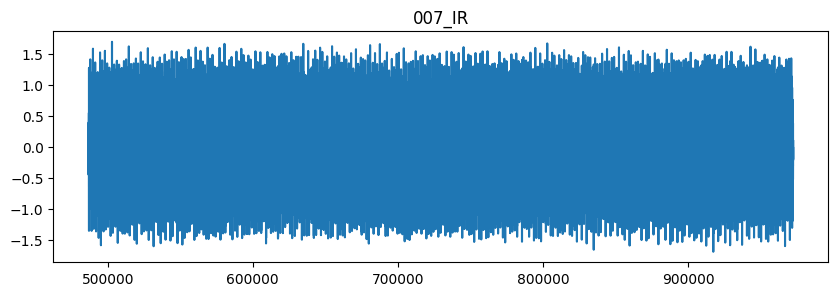

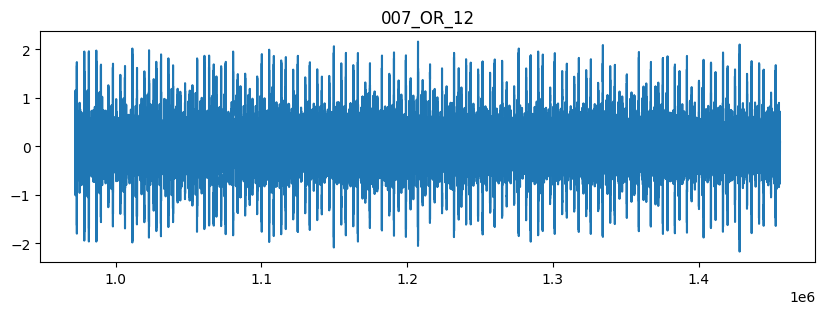

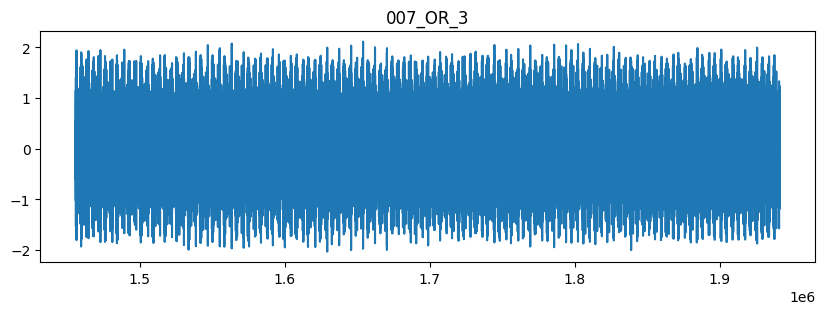

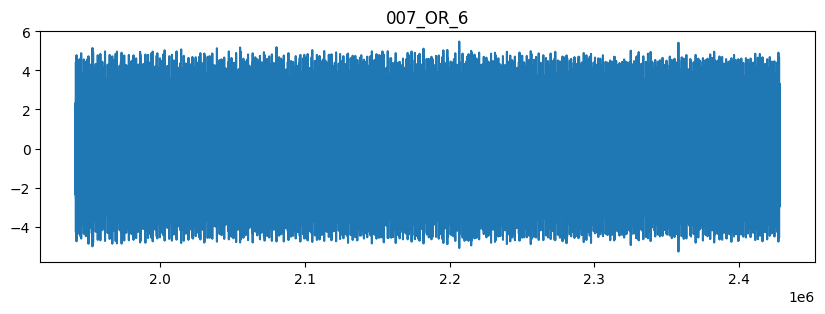

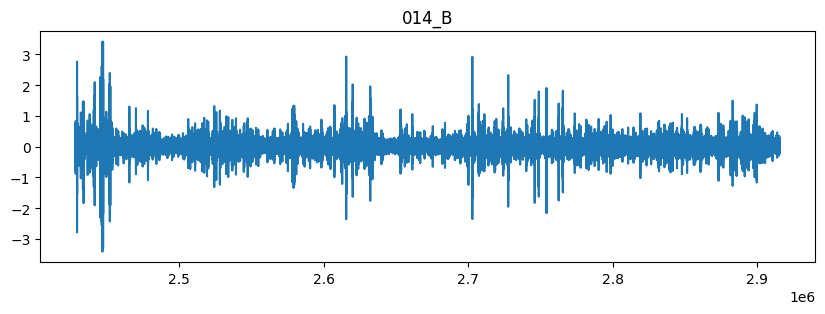

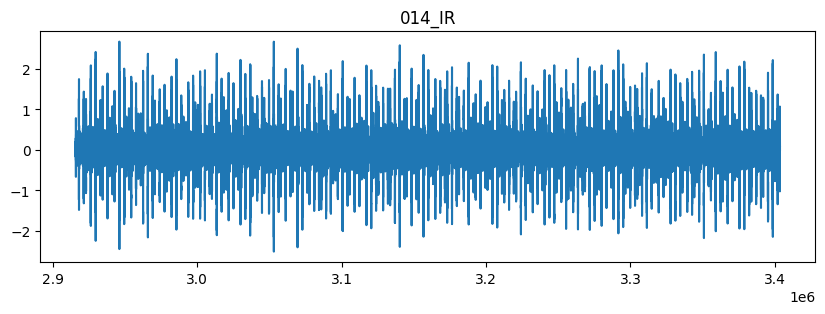

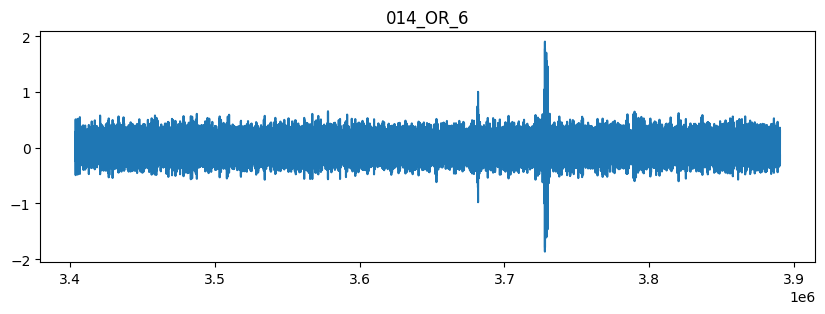

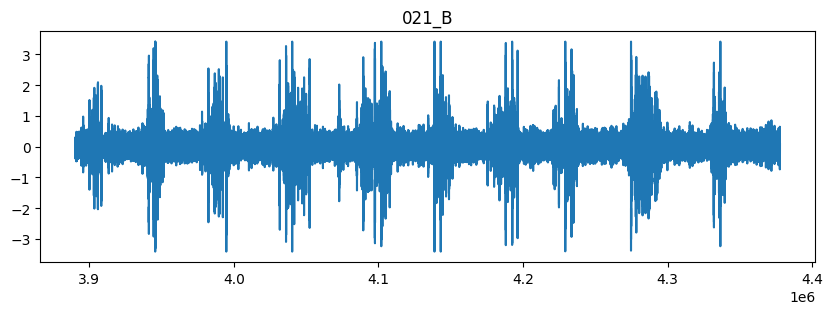

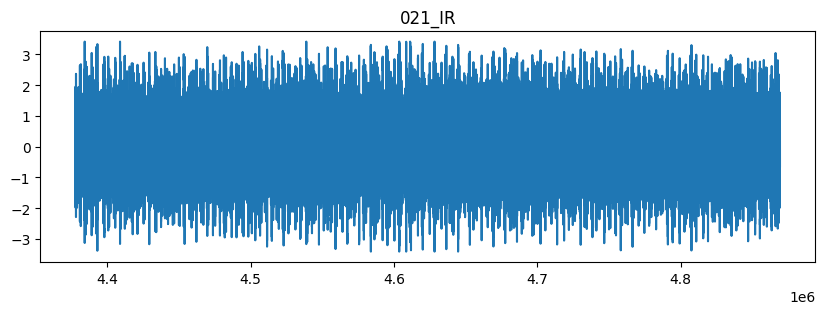

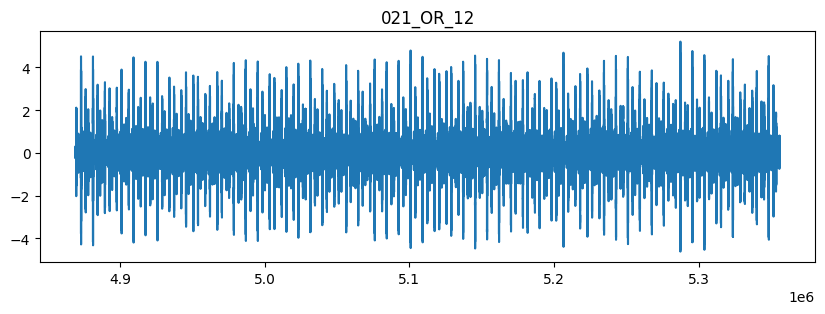

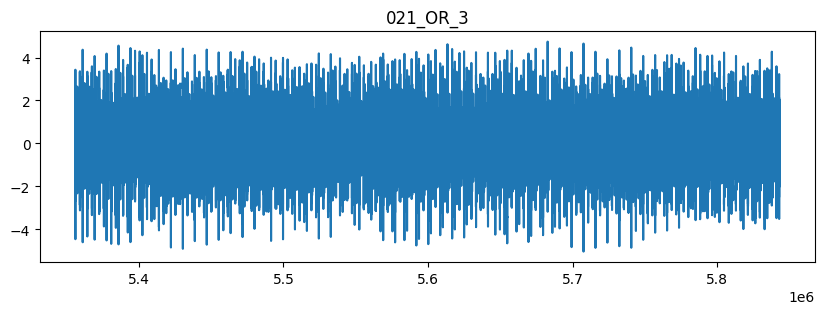

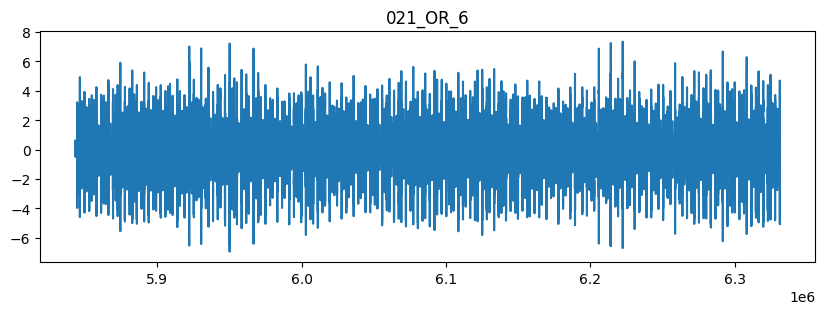

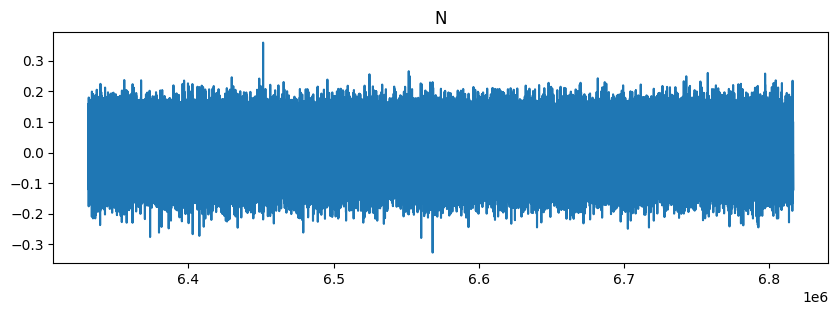

In [26]:
faults2 = df2['fault'].unique()
for  f in faults2:
    plt.figure(figsize=(10,3))
    plt.plot(df2[df2['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

In [27]:
df3 = pd.read_csv('3hp_all_faults.csv')

In [28]:
df3

,DE_data,fault
0,0.253050,007_B
1,0.257431,007_B
2,0.238447,007_B
3,0.218838,007_B
4,0.191718,007_B
...,...,...
6814670,0.035673,N
6814671,-0.004590,N
6814672,-0.023574,N
6814673,0.005215,N


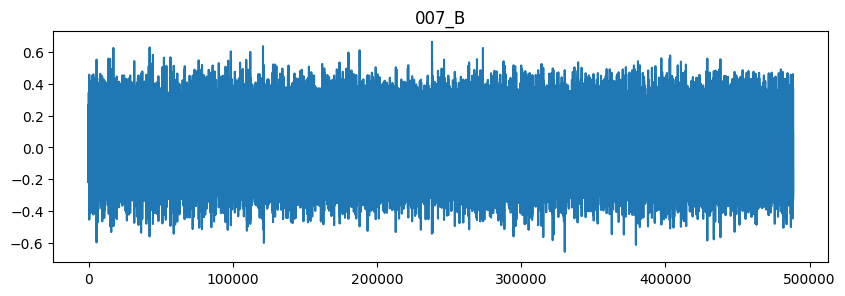

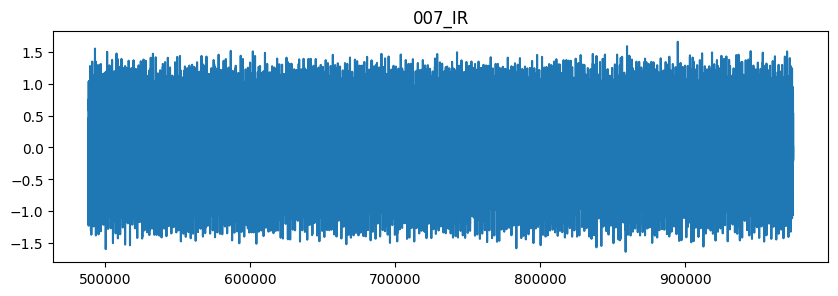

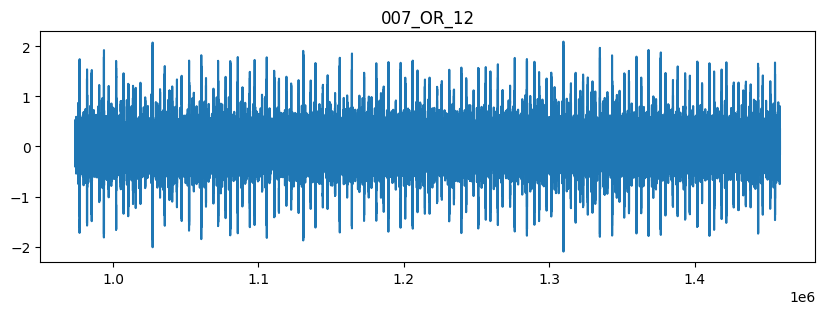

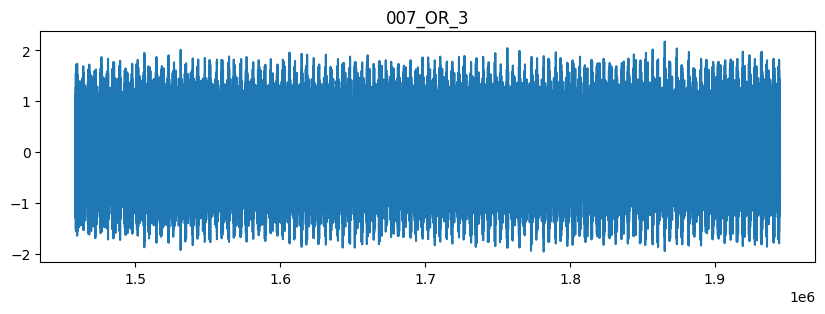

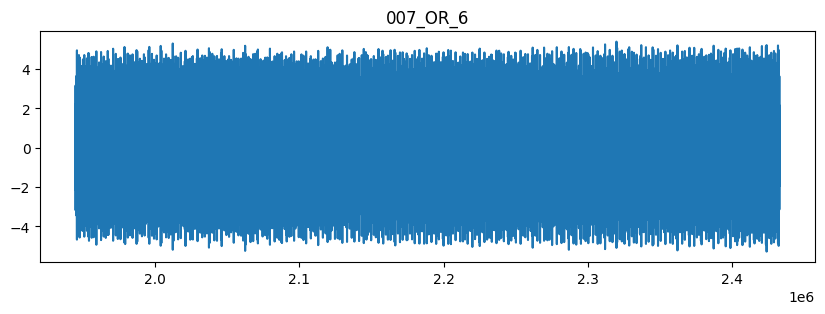

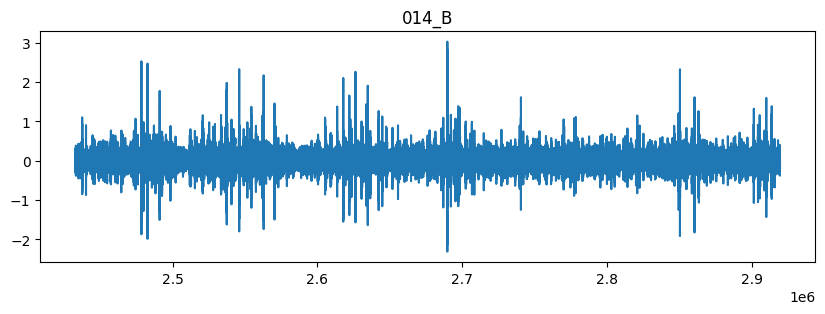

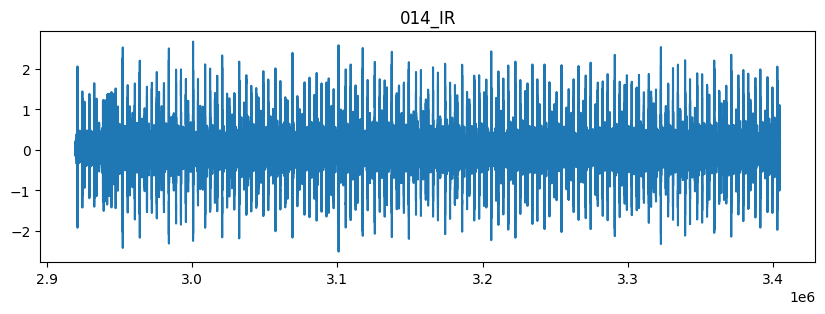

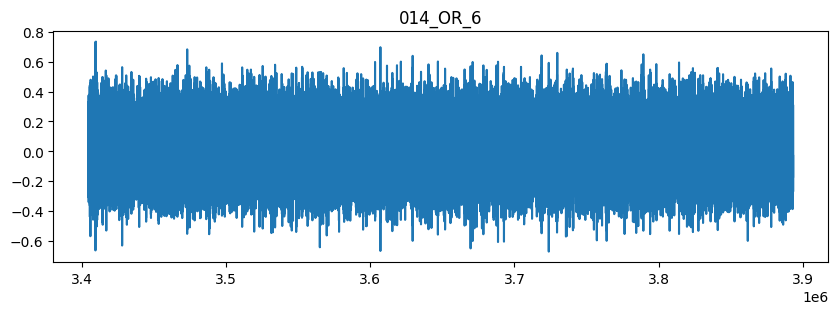

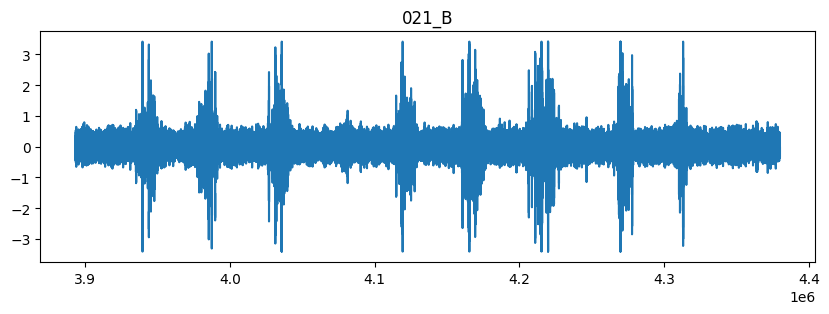

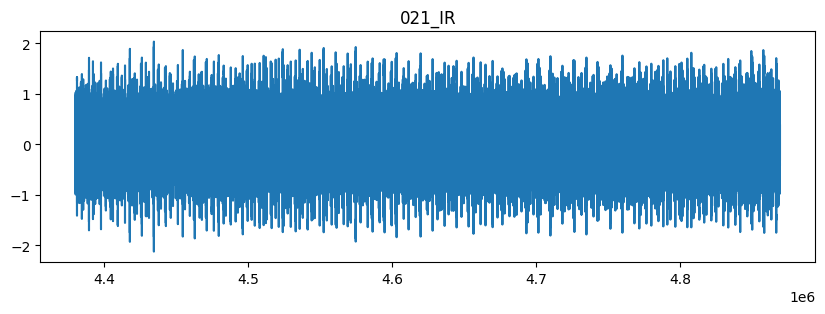

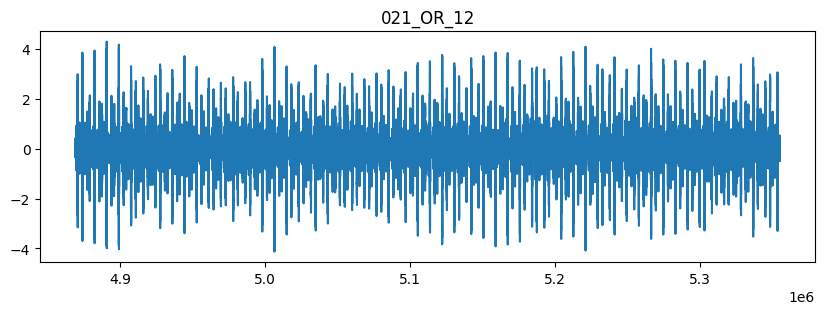

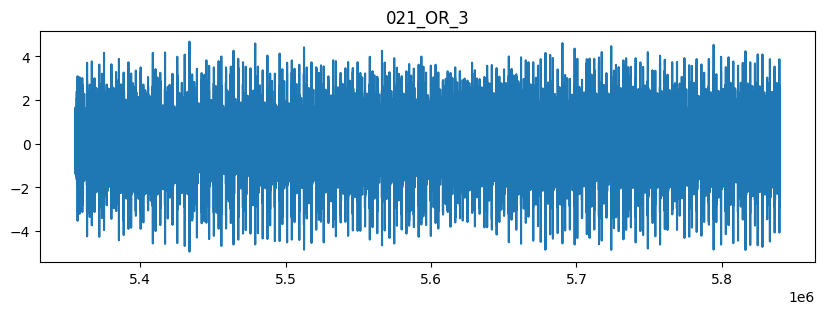

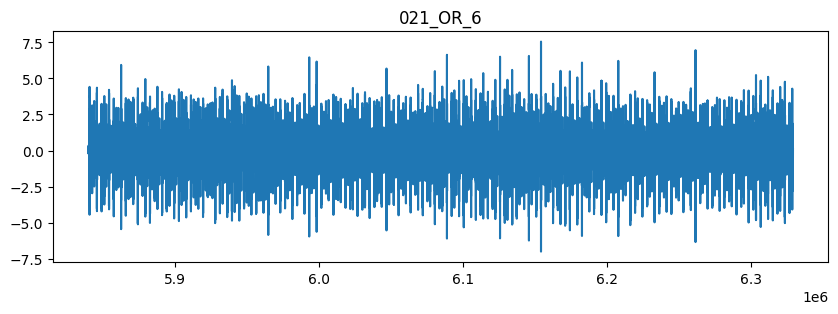

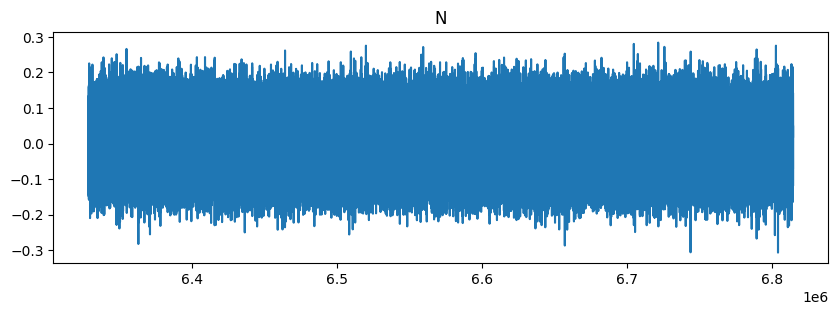

In [29]:
faults3 = df3['fault'].unique()
for  f in faults3:
    plt.figure(figsize=(10,3))
    plt.plot(df3[df3['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()